## Logistic Regression

It's a _classifier_ that predicts probability. 
The probabilities are numeric values and based on these the classification is done.

It classifies binary output. 

It's a 'generalised linear model' algorithm.

* Logistic Regression is a regression algorithm which does classification 
* Calculates probability of belonging to a particular class
* If P>50% --> 1
* If P<50% --> 0

----------------------------------------------------------------------------

**Generalised Linear Model**

    g(E(y)) = a + bx1 + Yx2

where,

* E(y) = expected value of dependent var (label)
* x1 , x2 = independent var (features)
* g = link function

-----------------------------------------

**How does Logistic Regression work ?**

* It takes the features and labels (Training Data)

* Fits a linear model (weights & biases)

* And instead of giving the result, it gives the logistic resylt

-----------------------------------------------------------------

**Probability** is the chance of occurenence of an event.

--------------------------------------------------------------

**Why Linear Regression is not used ?**

Because the probability lies in between 0 & 1, but x is an independent varianble which can be given any value, which will further give the dependent var or y.
Hence, when drawing the Linear regression slope the value might get over 1.

We don't use linear regression because it simply does not fulfill the same role. The least squares criterion for fitting a linear regression does not respect the role of the predictions as conditional probabilities, while logistic regression maximizes the likelihood of the training data with respect to the predicted conditional probabilities. Additionally, the predictions from linear regression can be any real number, which negates their use as probabilities.

-----------------------------------------------------------------

The logistic regression model transforms the linear regression function continuous value output into categorical value output using a _sigmoid function_, which maps any real-valued set of independent variables input into a value between 0 and 1. This function is known as the _logistic function_.

**Sigmoid Function**

The sigmoid function is a non-linear function that is used to transform the output of the logistic regression model, predicted values, into a probability.

    σ(z) = 1/(1+e^-z)   or    y = 1/(1+e^-x)

It's an S-shaped curve, converts the continuous variable data into the probability i.e. between 0 and 1.

* y tends towards 1 as x → ∞
* y tends towards 0 as x → − ∞
* y is always bounded between 0 and 1

where the probability of being a class can be measured as:
 
    P(y=1) = y
    P(y=0) = 1−y

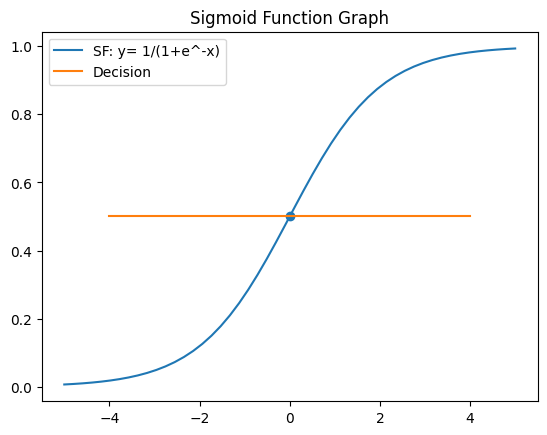

In [20]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(arr, scale=1):
    arr = np.asarray(arr)
    result = 1/(1 + np.exp(-arr*scale))
    return result

x = np.linspace(-5, 5)
y = sigmoid(x)

fig, ax = plt.subplots()
plt.title("Sigmoid Function Graph")
ax.plot(x, y, label= 'SF: y= 1/(1+e^-x)')
ax.plot((-4, 0, 4), (0.5, 0.5, 0.5), label='Decision')
ax.scatter((0), (0.5))
plt.legend()

Putting the output,

    y = wx + b                                    

into sigmoid function
 
    y = 1/(1+e^-x)

we get,

    y' = 1/(1+e^-y)


And this value becomes a probability as it lies between 0 & 1.

--------------------------------------

The y in equation (y = wx + b) is called _log of odds_.

    Odds = P / 1-P

Therefore,

    y = log ( y' / 1-y')

---------------------------------------


**Why Mean Squared Error is not used ?**

Now for a given problem there will be data points and using those data points curve fitting is to be performed.

With the introduction of Sigmoid function there is non linearity here and due to that non linearity the Error function becomes Non-Linear, resulting in lots of global minima(there might be possibilty of losing global minima by finding local minima) & the Gradient Descent algo will not be able to converge.

That's why Mean Squared Error is not used.

-----------------------------------------------------------

So, **Log Loss** is used.

Log Loss different at y=0 and different at y=1.

The Loss Functions are,

    Loss = -y log(y')           at y=1
    Loss = -(1-y) log(1-y')     at y=0 

Now there are two functions to deal with, adding more complications!
So they are combined into one function by adding both the equations.

    Loss = -y log(y') - (1-y) log(1-y')

The original values can be obtained be putting y=0 or y=1. 

Hence the two functions can be written as one.

---------------------------------------------------------------

The probability is thus calculated as,

    P = σ(θ^T * x)

where, θ = weights and x = inputs

Now how to find the weights ?

**How to train Logistic Regression Model ?**

* Need values of parameters in theta
* Need high values of probabilities near 1 for positive instances 
* Need high values of probabilities near 0 for negative instances 

Cost Function for single training instance, 
  
    C(θ) = -log (P)    if y = 1
    C(θ) = -log (1-P)  if y = 0

The cost tends to get very high in case of wrong predictions. 

Combining the functions by adding them,

    C(θ) = - {y log(P) + (1-y) log(1-P)}

Cost Function for all the data, by averaging we get,
   
    J(θ) = -1/m ∑ y^i * log(P^i) + (1-y^i) log(1-P^i)

* There's no closed form function to calculate the minima of this equation
* It's a convex function that means Gradient Descent can be applied to find minima and get the values of the weights that minimizes the function

------------------------------------------------------------------


**Example**

###### Import necessary libraries

In [32]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression

###### Load the dataset

In [22]:
iris = datasets.load_iris()

###### Describing the problem

In [23]:
iris['data'].shape

(150, 4)

In [24]:
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [25]:
iris['data']

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [26]:
iris['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [27]:
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

###### Taking only one cateory to demonstrate Logistic Regression

Train a Logistic Regression classifier to predict whether a flower is Iris Virginica or not.

In [28]:
# feature

x = iris["data"][:,3:]
x

array([[0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.4],
       [0.3],
       [0.2],
       [0.2],
       [0.1],
       [0.2],
       [0.2],
       [0.1],
       [0.1],
       [0.2],
       [0.4],
       [0.4],
       [0.3],
       [0.3],
       [0.3],
       [0.2],
       [0.4],
       [0.2],
       [0.5],
       [0.2],
       [0.2],
       [0.4],
       [0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.4],
       [0.1],
       [0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.1],
       [0.2],
       [0.2],
       [0.3],
       [0.3],
       [0.2],
       [0.6],
       [0.4],
       [0.3],
       [0.2],
       [0.2],
       [0.2],
       [0.2],
       [1.4],
       [1.5],
       [1.5],
       [1.3],
       [1.5],
       [1.3],
       [1.6],
       [1. ],
       [1.3],
       [1.4],
       [1. ],
       [1.5],
       [1. ],
       [1.4],
       [1.3],
       [1.4],
       [1.5],
       [1. ],
       [1.5],
       [1.1],
       [1.8],
      

In [31]:
# label

y = (iris['target'] == 2).astype(int)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

###### Define the model

In [33]:
model = LogisticRegression()

###### Train the model

In [34]:
model.fit(x, y)

LogisticRegression()

###### Make predictions

In [35]:
check = model.predict(([[1.6]]))
check

array([0])

In [36]:
species = iris.target_names[check[0]]
species

'setosa'

In [37]:
check = model.predict(([[2.6]]))
check

array([1])

In [40]:
#species = iris.target_names[check[0]]
species

'versicolor'

###### Visulaizations

In [42]:
X = np.linspace(0,3, 1000).reshape(-1,1)
X

array([[0.        ],
       [0.003003  ],
       [0.00600601],
       [0.00900901],
       [0.01201201],
       [0.01501502],
       [0.01801802],
       [0.02102102],
       [0.02402402],
       [0.02702703],
       [0.03003003],
       [0.03303303],
       [0.03603604],
       [0.03903904],
       [0.04204204],
       [0.04504505],
       [0.04804805],
       [0.05105105],
       [0.05405405],
       [0.05705706],
       [0.06006006],
       [0.06306306],
       [0.06606607],
       [0.06906907],
       [0.07207207],
       [0.07507508],
       [0.07807808],
       [0.08108108],
       [0.08408408],
       [0.08708709],
       [0.09009009],
       [0.09309309],
       [0.0960961 ],
       [0.0990991 ],
       [0.1021021 ],
       [0.10510511],
       [0.10810811],
       [0.11111111],
       [0.11411411],
       [0.11711712],
       [0.12012012],
       [0.12312312],
       [0.12612613],
       [0.12912913],
       [0.13213213],
       [0.13513514],
       [0.13813814],
       [0.141

In [48]:
y_prob = model.predict_proba(X)
y_prob

array([[9.99249051e-01, 7.50949397e-04],
       [9.99239224e-01, 7.60776030e-04],
       [9.99229269e-01, 7.70731151e-04],
       ...,
       [3.08499021e-03, 9.96915010e-01],
       [3.04523414e-03, 9.96954766e-01],
       [3.00598887e-03, 9.96994011e-01]])

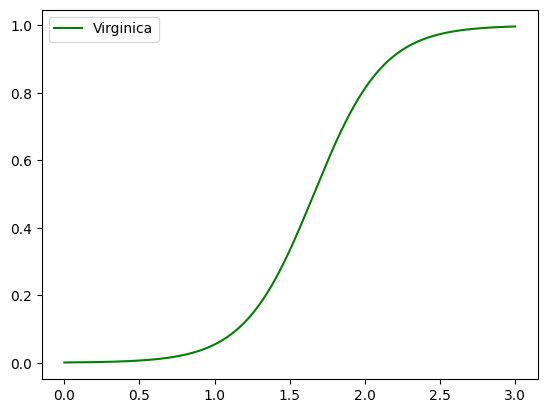

In [49]:
plt.plot(X, y_prob[:,1], "g-", label= "Virginica")
plt.legend()
#plt.show()